Original Dataset:
     User1  User2 Interaction_Type            Timestamp             Message
0    Frank    Ivy             Like  2025-01-03 07:47:00       Nice insight!
1   Hannah  Alice           Follow  2025-01-02 05:22:00            Love it!
2    Frank    Ivy          Mention  2025-01-02 17:52:00  Following you now.
3    David    Eve             Like  2025-01-02 09:18:00   Happy to connect.
4  Charlie    Ivy          Comment  2025-01-03 10:28:00    Amazing content!

Missing Values:
User1               0
User2               0
Interaction_Type    0
Timestamp           0
Message             0
dtype: int64

Dataset after dropping missing values:
     User1  User2 Interaction_Type            Timestamp             Message
0    Frank    Ivy             Like  2025-01-03 07:47:00       Nice insight!
1   Hannah  Alice           Follow  2025-01-02 05:22:00            Love it!
2    Frank    Ivy          Mention  2025-01-02 17:52:00  Following you now.
3    David    Eve             Like  2025-0

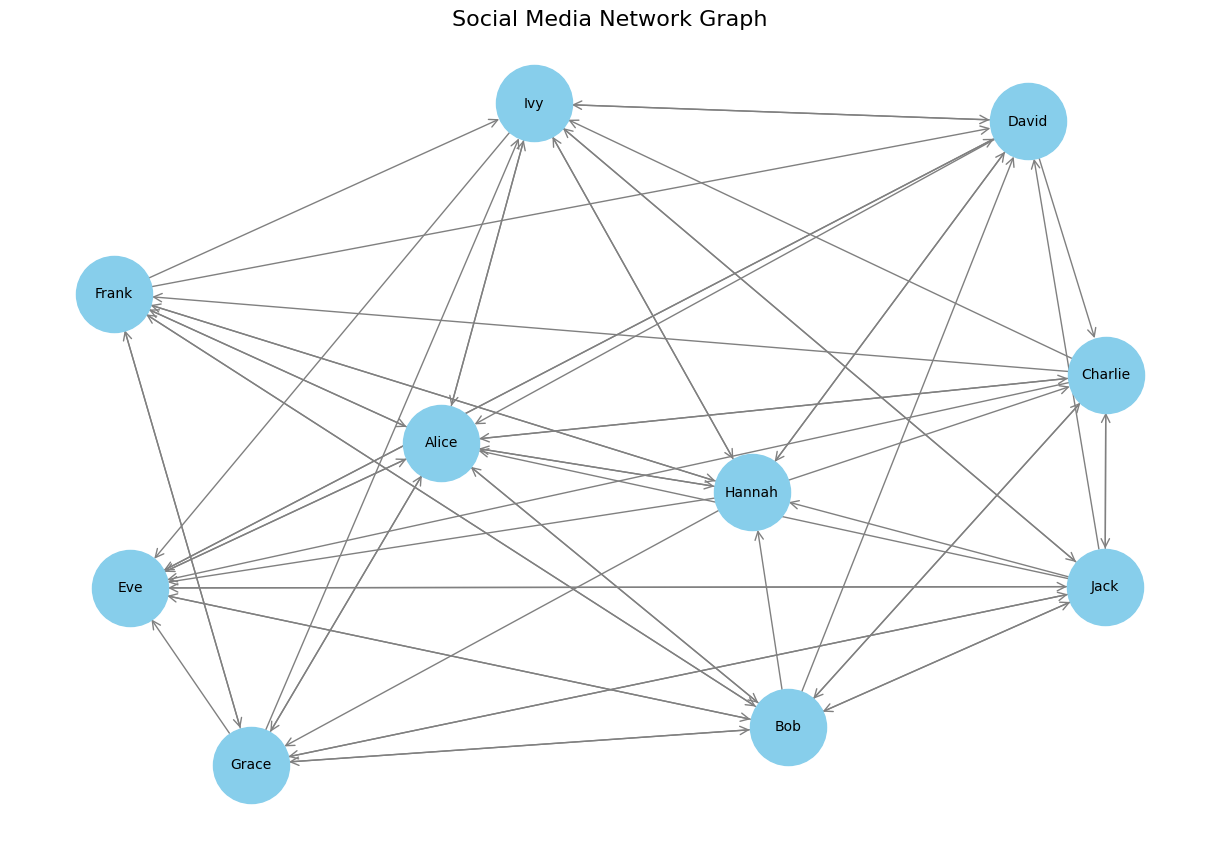


Processed dataset saved to processed_social_media_data.csv


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data_file = "/content/large_social_media_data.csv"  # Update this if the file is in a different path
df = pd.read_csv(data_file)

# Preview the dataset
print("Original Dataset:")
print(df.head())

# Step 1: Handle Missing Values
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()
print("\nDataset after dropping missing values:")
print(df.head())

# Step 2: Check and Remove Duplicates
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()
print("\nDataset after removing duplicates:")
print(df.head())

# Step 3: Convert Timestamps to Datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("\nDataset with converted Timestamp column:")
print(df.head())

# Step 4: Normalize User Names
df['User1'] = df['User1'].str.strip().str.capitalize()
df['User2'] = df['User2'].str.strip().str.capitalize()

print("\nDataset after normalizing User names:")
print(df.head())

# Step 5: Encode Interaction Types
interaction_mapping = {interaction: idx for idx, interaction in enumerate(df['Interaction_Type'].unique())}
df['Interaction_Type_Encoded'] = df['Interaction_Type'].map(interaction_mapping)

print("\nDataset after encoding Interaction_Type:")
print(df.head())

# Step 6: Generate Graph Data
# Create a graph using NetworkX
G = nx.from_pandas_edgelist(
    df,
    source='User1',
    target='User2',
    edge_attr='Interaction_Type',
    create_using=nx.DiGraph()  # Use DiGraph for directed graph
)

# Step 7: Display Graph Information
print("\nGraph Information:")
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))  # Display edges with attributes

# Step 8: Visualize the Graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Generate layout for the graph
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_color="black",
    edge_color="gray",
    arrowsize=15,
    arrowstyle='->'
)
plt.title("Social Media Network Graph", fontsize=16)
plt.show()

# Step 9: Save Processed Data (Optional)
processed_file = "processed_social_media_data.csv"
df.to_csv(processed_file, index=False)
print(f"\nProcessed dataset saved to {processed_file}")


In [ ]:
# Calculate centrality metrics to identify key users: degree, betweenness, and closeness centralities.

degree_centrality = nx.degree_centrality(G) # Identifies the most connected users based on their number of connections.
betweenness_centrality = nx.betweenness_centrality(G) # Measures the influence of users acting as bridges in the network.
closeness_centrality = nx.closeness_centrality(G) # Calculates how quickly a user can interact with others in the network.

# Print the centrality values
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)


Degree Centrality: {'Frank': 1.222222222222222, 'Ivy': 1.3333333333333333, 'Hannah': 1.4444444444444444, 'Alice': 1.7777777777777777, 'David': 1.222222222222222, 'Eve': 1.3333333333333333, 'Charlie': 1.222222222222222, 'Bob': 1.5555555555555554, 'Grace': 1.222222222222222, 'Jack': 1.4444444444444444}
Betweenness Centrality: {'Frank': 0.022123015873015874, 'Ivy': 0.03171296296296296, 'Hannah': 0.039947089947089946, 'Alice': 0.08601190476190476, 'David': 0.022817460317460316, 'Eve': 0.03125000000000001, 'Charlie': 0.027678571428571424, 'Bob': 0.05648148148148147, 'Grace': 0.02073412698412698, 'Jack': 0.050132275132275125}
Closeness Centrality: {'Frank': 0.6923076923076923, 'Ivy': 0.8181818181818182, 'Hannah': 0.75, 'Alice': 1.0, 'David': 0.75, 'Eve': 0.9, 'Charlie': 0.6923076923076923, 'Bob': 0.75, 'Grace': 0.6923076923076923, 'Jack': 0.6923076923076923}


In [ ]:
# To identify the community groups
from networkx.algorithms import community

# Detect communities in the graph using greedy modularity-based community detection
communities = community.greedy_modularity_communities(G)

# Print the detected communities
print("Detected Communities:")
for i, comm in enumerate(communities, 1):
    print(f"Community {i}: {list(comm)}")


Detected Communities:
Community 1: ['Charlie', 'David', 'Ivy', 'Eve', 'Jack', 'Hannah']
Community 2: ['Frank', 'Alice', 'Bob', 'Grace']


In [ ]:
# Reciprocity(Mutual Interaction)
reciprocity = nx.reciprocity(G)

print("Mutual Interaction:", reciprocity)

Mutual Interaction: 0.7096774193548387


In [ ]:
# Most popular interaction type
interaction_counts = df['Interaction_Type'].value_counts()

print("Most popular Interaction type:", interaction_counts)

Most popular Interaction type: Interaction_Type
Follow     28
Mention    22
Comment    20
Like       15
Share      15
Name: count, dtype: int64


In [ ]:
import networkx as nx
from networkx.algorithms import community

# Assume G is your social network graph

# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Define a threshold for identifying influencers (e.g., top 10% in degree centrality)
degree_threshold = sorted(degree_centrality.values(), reverse=True)[int(len(degree_centrality) * 0.1)]

# Identify Influencers based on Degree Centrality
influencers_degree = [node for node, value in degree_centrality.items() if value >= degree_threshold]

# Identify Common Users based on Degree Centrality (users below the threshold)
common_users_degree = [node for node, value in degree_centrality.items() if value < degree_threshold]

# Identify Influencers based on Betweenness Centrality (top 10% in betweenness centrality)
betweenness_threshold = sorted(betweenness_centrality.values(), reverse=True)[int(len(betweenness_centrality) * 0.1)]
influencers_betweenness = [node for node, value in betweenness_centrality.items() if value >= betweenness_threshold]

# Identify Influencers based on Closeness Centrality (top 10% in closeness centrality)
closeness_threshold = sorted(closeness_centrality.values(), reverse=True)[int(len(closeness_centrality) * 0.1)]
influencers_closeness = [node for node, value in closeness_centrality.items() if value >= closeness_threshold]

# Print the results
print("Influencers based on Degree Centrality:", influencers_degree)
print("Common Users based on Degree Centrality:", common_users_degree)
print("Influencers based on Betweenness Centrality:", influencers_betweenness)
print("Influencers based on Closeness Centrality:", influencers_closeness)


Influencers based on Degree Centrality: ['Alice', 'Bob']
Common Users based on Degree Centrality: ['Frank', 'Ivy', 'Hannah', 'David', 'Eve', 'Charlie', 'Grace', 'Jack']
Influencers based on Betweenness Centrality: ['Alice', 'Bob']
Influencers based on Closeness Centrality: ['Alice', 'Eve']
